<a href="https://colab.research.google.com/github/ochekroun/labs/blob/master/Generation_de_texte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Préparation des données

In [145]:
!rm -r sample_data

rm: cannot remove 'sample_data': No such file or directory


In [146]:
!ls -halt

total 9.9M
-rw-r--r-- 1 root root 9.9M May 14 18:28 prenoms.csv
drwxr-xr-x 1 root root 4.0K May 14 18:27 .
drwxr-xr-x 1 root root 4.0K May 14 18:25 ..
drwxr-xr-x 4 root root 4.0K May 14 09:18 .config


In [147]:
!head prenoms.csv

year,name,sex,count
1900,Abeline,F,3
1900,Abelle,F,3
1900,Ada,F,4
1900,Adelaide,F,194
1900,Adèle,F,661
1900,Adelheid,F,3
1900,Adelia,F,12
1900,Adelie,F,3
1900,Adelina,F,50


In [148]:
import pandas as pd

In [149]:
# on filtre, mélange etc les prénoms
df = pd.read_csv('prenoms.csv')
df['name'] = df['name'].str.lower()
df = df.groupby('name', as_index=False).agg({'count': 'sum'})
df = df[df['count'] >= 50]
df = df.sample(frac=1.0)
df = df[:100]

df

,name,count
806,aimerick,112
7296,edem,474
28409,sümeyye,78
31365,zeynab,299
3105,auregane,114
...,...,...
938,alaeddine,179
8260,erdem,588
14479,kayis,92
13561,johnathan,229


In [150]:
names = df['name'].tolist()

In [151]:
len(names)

100

In [152]:
# longueur max des prénoms
max(len(name) for name in names)

13

In [153]:
names

['aimerick',
 'edem',
 'sümeyye',
 'zeynab',
 'auregane',
 'ylann',
 'sidi-mohamed',
 'nadjet',
 'floraine',
 'angelyne',
 'tayfun',
 'shanyce',
 'amélien',
 'louis-charles',
 'maguy',
 'félicité',
 'mélodie',
 'tiphanie',
 'helian',
 'pamella',
 'angely',
 'wallid',
 'lysandre',
 'muharrem',
 'elsie',
 'sublime',
 'artémis',
 'doria',
 'narjiss',
 'magomed',
 'olivienne',
 'nicolette',
 'malou',
 'berthold',
 'nguyen',
 'dawid',
 'monia',
 'ege',
 'siga',
 'salih',
 'bintou',
 'jean-hugues',
 'si-mohamed',
 'gennaro',
 'willy',
 'chelby',
 'noëlly',
 'vynce',
 'dominik',
 'salomee',
 'june',
 'withney',
 'narjis',
 'samira',
 'dionisio',
 'nolhann',
 'ghali',
 'talyana',
 'lyha',
 'marc-edouard',
 'victor-manuel',
 'janel',
 'vitaly',
 'safiatou',
 'yve',
 'barnabé',
 'merick',
 'apollinaire',
 'yaëlle',
 'réginald',
 'wieme',
 'charlize',
 'raffi',
 'nadeige',
 'thiphanie',
 'jerry',
 'olivier',
 'raphaella',
 'sabria',
 'rubén',
 'pier',
 'soan',
 'dyclan',
 'eléonor',
 'calvyn',
 '

## Bigrammes

In [154]:
# bigrammes
bigrams = {}

for name in names:
  #print(name)
  name = ['.'] + list(name) + ['.']
  for l1,l2 in zip(name, name[1:]):
    bigram = (l1,l2)
    bigrams[bigram] = bigrams.get(bigram, 0) + 1
    #print(l1, l2)

In [155]:
# bigrammes triés par nombre d'occurences
sorted(bigrams.items(), key=lambda kv:-1*kv[1])

[(('e', '.'), 26),
 (('a', 'n'), 18),
 (('h', 'a'), 16),
 (('a', '.'), 14),
 (('l', 'i'), 13),
 (('.', 's'), 12),
 (('n', 'a'), 12),
 (('n', '.'), 11),
 (('e', 'l'), 11),
 (('l', 'y'), 11),
 (('a', 'l'), 11),
 (('.', 'a'), 10),
 (('m', 'e'), 10),
 (('a', 'r'), 10),
 (('n', 'e'), 9),
 (('i', 'e'), 9),
 (('e', 'r'), 8),
 (('d', '.'), 8),
 (('.', 'n'), 8),
 (('.', 'm'), 8),
 (('y', '.'), 8),
 (('e', 'd'), 7),
 (('a', 'm'), 7),
 (('i', 's'), 7),
 (('l', 'l'), 7),
 (('s', 'a'), 7),
 (('.', 'e'), 6),
 (('i', 'n'), 6),
 (('s', '.'), 6),
 (('n', 'i'), 6),
 (('o', 'l'), 6),
 (('r', 'i'), 5),
 (('i', 'c'), 5),
 (('a', 'b'), 5),
 (('r', 'e'), 5),
 (('l', 'a'), 5),
 (('s', 'i'), 5),
 (('l', 'o'), 5),
 (('g', 'e'), 5),
 (('.', 't'), 5),
 (('e', 'n'), 5),
 (('o', 'u'), 5),
 (('c', 'h'), 5),
 (('m', 'a'), 5),
 (('i', 'a'), 5),
 (('.', 'd'), 5),
 (('.', 'j'), 5),
 (('.', 'c'), 5),
 (('y', 'a'), 5),
 (('e', 'm'), 4),
 (('m', '.'), 4),
 (('y', 'n'), 4),
 (('n', 'n'), 4),
 (('d', 'i'), 4),
 (('o', 'r'), 

## PyTorch

In [156]:
import torch

In [157]:
# on fait la liste de tous les caractères dans nos prénoms
chars = sorted(list(set(''.join(names))))

In [158]:
# mapping de chaque caractère à un index dans le tableau
# on rajoute le caractère "." à la main
char_to_index = {s:i+1 for i,s in enumerate(chars)}
char_to_index['.'] = 0
char_to_index

nb_chars = len(char_to_index)
print(f"Nombre total de caractères: {nb_chars}")

Nombre total de caractères: 30


In [159]:
# On crée notre tenseur (= tableau) pour y placer nos compteurs d'occurence
N = torch.zeros((nb_chars, nb_chars), dtype=torch.int32)


In [160]:
for name in names:
  name = ['.'] + list(name) + ['.']
  for l1,l2 in zip(name, name[1:]):
    ix1 = char_to_index[l1]
    ix2 = char_to_index[l2]
    N[ix1, ix2] += 1

In [161]:
import matplotlib.pyplot as plt

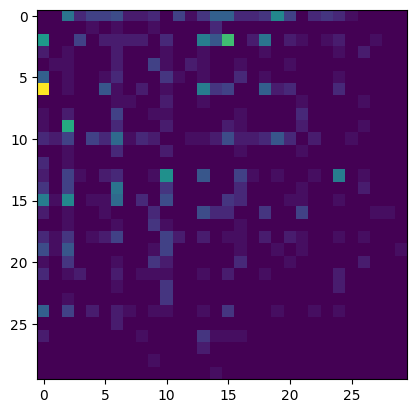

In [162]:
plt.imshow(N)

In [163]:
index_to_char = {i:c for c,i in char_to_index.items()}

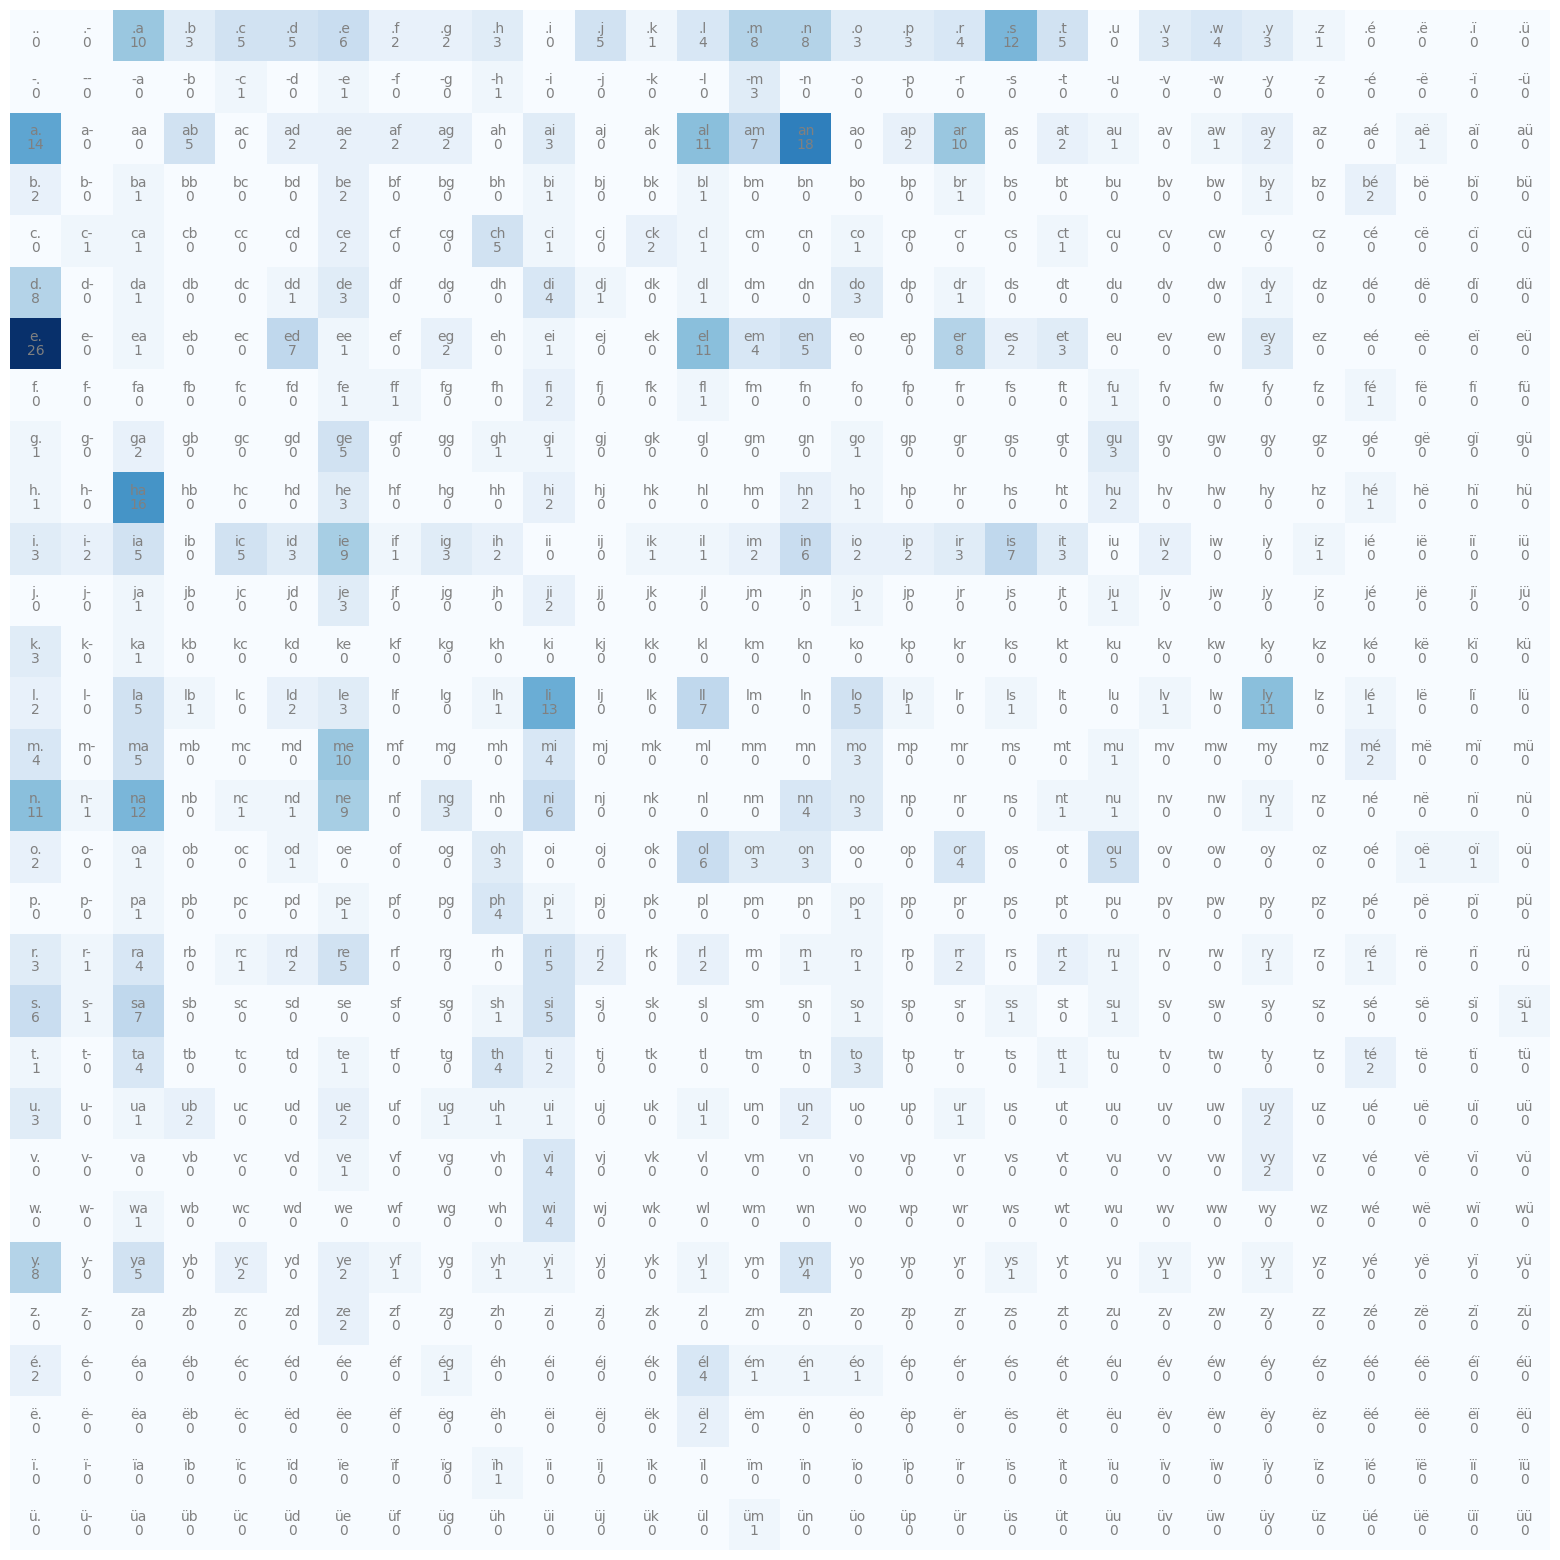

In [164]:
plt.figure(figsize=(20, 20))
plt.imshow(N, cmap='Blues')

for i in range(nb_chars):
    for j in range(nb_chars):
        chstr = index_to_char[i] + index_to_char[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [165]:
char_to_index['a']

2

In [166]:
N[3]

tensor([2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 2, 0, 0, 0], dtype=torch.int32)

In [167]:
N[3].sum()

tensor(11)

In [168]:
p = N[3]/N[3].sum()
p

tensor([0.1818, 0.0000, 0.0909, 0.0000, 0.0000, 0.0000, 0.1818, 0.0000, 0.0000,
        0.0000, 0.0909, 0.0000, 0.0000, 0.0909, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0909, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0909, 0.0000, 0.1818,
        0.0000, 0.0000, 0.0000])

In [169]:
g = torch.Generator().manual_seed(42)
p = torch.rand(3, generator=g)
p = p / p.sum()
p


tensor([0.4047, 0.4197, 0.1756])

In [170]:
torch.multinomial(p, num_samples=10, replacement=True, generator=g)

tensor([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [171]:
g = torch.Generator().manual_seed(42)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
index_to_char[ix]

'.'

In [185]:
for i in range(15):
  ix = 0
  out = []
  while True:
    p = N[ix]
    p = p / p.sum()
    #p = torch.ones(nb_chars) / nb_chars
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(index_to_char[ix])
    if ix == 0:
      break
  print(''.join(out))


namenchay.
ris.
ab.
chafielyvi.
egened.
a.
nyn.
wisorichadjies.
sarllarieynne.
k.
de.
chounetied.
men.
ane.
johordyfiafu.


In [187]:
N.sum(dim=1, keepdim=True)

tensor([[100],
        [  6],
        [ 85],
        [ 11],
        [ 15],
        [ 24],
        [ 74],
        [  7],
        [ 14],
        [ 28],
        [ 63],
        [  8],
        [  4],
        [ 54],
        [ 29],
        [ 54],
        [ 30],
        [  8],
        [ 34],
        [ 24],
        [ 18],
        [ 17],
        [  7],
        [  5],
        [ 28],
        [  2],
        [ 10],
        [  2],
        [  1],
        [  1]])

In [189]:
P = N
P = P / P.sum(dim=1, keepdim=True)
P

tensor([[0.0000, 0.0000, 0.1000, 0.0300, 0.0500, 0.0500, 0.0600, 0.0200, 0.0200,
         0.0300, 0.0000, 0.0500, 0.0100, 0.0400, 0.0800, 0.0800, 0.0300, 0.0300,
         0.0400, 0.1200, 0.0500, 0.0000, 0.0300, 0.0400, 0.0300, 0.0100, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1667, 0.0000, 0.1667, 0.0000, 0.0000,
         0.1667, 0.0000, 0.0000, 0.0000, 0.0000, 0.5000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.1647, 0.0000, 0.0000, 0.0588, 0.0000, 0.0235, 0.0235, 0.0235, 0.0235,
         0.0000, 0.0353, 0.0000, 0.0000, 0.1294, 0.0824, 0.2118, 0.0000, 0.0235,
         0.1176, 0.0000, 0.0235, 0.0118, 0.0000, 0.0118, 0.0235, 0.0000, 0.0000,
         0.0118, 0.0000, 0.0000],
        [0.1818, 0.0000, 0.0909, 0.0000, 0.0000, 0.0000, 0.1818, 0.0000, 0.0000,
         0.0000, 0.0909, 0.0000, 0.0000, 0.0909, 0.0000, 0.0000, 0.0000, 0.0000,
       

In [203]:
for i in range(15):
  ix = 0
  out = []
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(index_to_char[ix])
    if ix == 0:
      break
  print(''.join(out))

k.
lipoh.
aed.
sominichunna.
jar.
r.
y.
ffémir.
are.
men.
dilorisa.
sirivyanubyfubithie.
sirllihaguivit.
félpoëlynethairedlolisizelynamihar.
kantoméoliesümanab.


In [204]:
# evaluation
n = 0
log_likelihood = 0.0
for name in names:
  #print(name)
  name = ['.'] + list(name) + ['.']
  for ch1,ch2 in zip(name, name[1:]):
    ix1 = char_to_index[ch1]
    ix2 = char_to_index[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{index_to_char[ix1]}{index_to_char[ix2]}: {prob:.3f} {logprob:.3f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-1682.5787)
nll=tensor(1682.5787)
2.205214500427246
